# Problem Statement
Create a regression model to predict flight fares using features like departure and arrival locations, flight duration, airline, and travel date. The aim is to accurately estimate flight prices, helping travelers with their planning and airlines with their pricing strategies.

# Data Preparetion:
data = https://docs.google.com/spreadsheets/d/1BBA4uUf6b4gd8JaJdlFRXvzxZtb4djWj/edit?usp=drive_link&ouid=114815927267366108906&rtpof=true&sd=true

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/mount/')

Mounted at /content/mount/


In [3]:
# Load Data
train_data = pd.read_excel(r"/content/mount/MyDrive/csv_files/ML PR REG1/fligh_fare_train_data.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# shape of train_data
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation: There are potential outliers in the "Price" column, especially at the higher end, as indicated by the max value, which is significantly higher than the Interquartile Range.

Skewness:1.8126


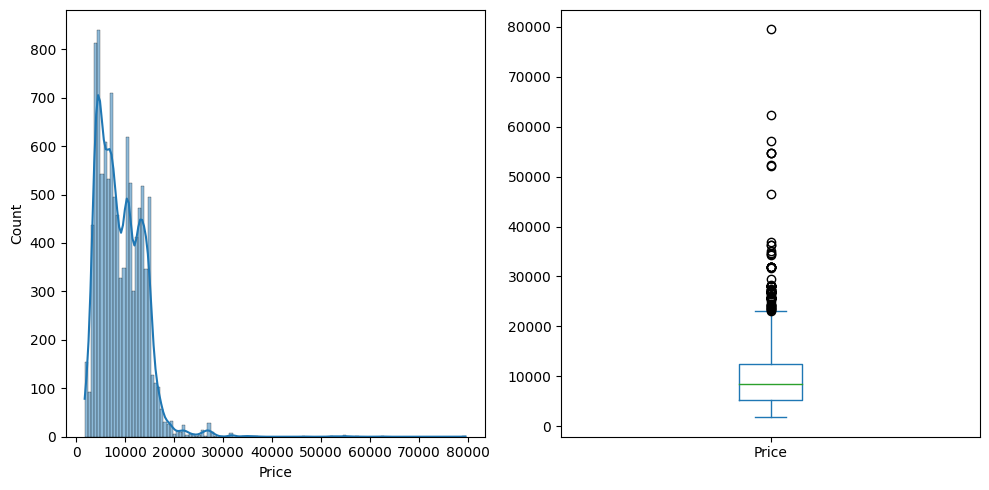

In [7]:
# check the Distribution of "Price" Columns
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(train_data['Price'],kde = True)
print(f"Skewness:{train_data['Price'].skew():.4f}")

plt.subplot(1,2,2)
train_data["Price"].plot(kind = "box")

plt.tight_layout()

Observation:
The "Price" column distribution is positively skewed with skewness of 1.8126 , indicting longer tail on the hihger end.

In [8]:
# Outlier detect and remove by z-score method
mean = train_data["Price"].mean()
std = train_data["Price"].std()
treshold = 3
train_data["Z-score"] = np.abs((train_data["Price"]-mean)/std)
outlier = train_data[train_data["Z-score"]>treshold]
print(f"There are {len(outlier)} outlier in the 'Price' column")
print(f"Index of Outlier are {outlier.index}")

There are 96 outlier in the 'Price' column
Index of Outlier are Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,   936,
         946,   959,   975,  1196,  1246,  1341,  1424,  1466,  1478,  1629,
        1654,  1785,  1918,  2055,  2099,  2108,  2495,  2556,  2618,  2635,
        2693,  2924,  3032,  3111,  3257,  3400,  3535,  3700,  4012,  4521,
        4676,  4829,  5013,  5136,  5372,  5439,  5662,  5701,  5710,  5719,
        5738,  5745,  5856,  5986,  6314,  6407,  6576,  6588,  6605,  6991,
        7351,  7356,  7377,  7537,  7554,  7617,  7713,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,
        9019,  9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
       10189, 10353, 10364, 10383, 10439, 10511],
      dtype='int64')


In [9]:
 # drop the Outlier from train_data
 train_data = train_data.drop(outlier.index)

In [10]:
train_data.shape

(10587, 12)

## Handling missing Value

In [11]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [12]:
# There is only one null value we remove .
train_data = train_data.dropna()

In [13]:
# check Duplicate Value
train_data.duplicated().sum()

220

In [14]:
# There are 220 duplicated value lets remove and keep first value
train_data = train_data.drop_duplicates(keep="first")

In [15]:
train_data.duplicated().sum()

0

In [16]:
# DONE!

## Feature Engineering

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z-score
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1.125496
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,0.309033
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1.039810
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0.622173
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0.914033


In [18]:
# let's split the "Date_of_Journey".
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])
train_data["Day"] = train_data["Date_of_Journey"].dt.day
train_data["Month"] = train_data["Date_of_Journey"].dt.month
train_data["Year"] = train_data["Date_of_Journey"].dt.year
train_data["Day_of_week"] = train_data["Date_of_Journey"].dt.day_name()

<ipython-input-18-f75fa239a668>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])


In [19]:
# let's split "Dep_Time" into "Dep_Hour" and "Dep_Min"
train_data["Dep_Houe"] = train_data["Dep_Time"].str.split(":").str[0].astype("int64")
train_data["Dep_Min"] = train_data["Dep_Time"].str.split(":").str[1].astype("int64")

In [20]:
# lets split "Arrival_Time" into "Arrival_Hour" and "Arrival_Min"
train_data['Arrival_Hour'] = train_data['Arrival_Time'].str.split(':').str[0].astype('int64')
train_data['Arrival_Minute'] = train_data['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0].astype('int64')

In [21]:
# let's "Duration" convert  to min column
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '23h 10m', '18h 10m', '16h', '2h 20m', '8h',
       '16h 55m', '3h 10

Observation:
In "Duration" column there are only "m" suffix value this (stands for) is not possible so search and delete.

In [22]:
train_data["Duration_h"] = train_data["Duration"].str.split(" ").str[0].str.replace("h","")
train_data[train_data["Duration_h"].str.contains("m")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Z-score,Day,Month,Year,Day_of_week,Dep_Houe,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,...,1.786878,6,3,2019,Wednesday,16,50,16,55,5m


In [23]:
train_data = train_data.drop([6474],axis = 0)

In [24]:
train_data["Duration_h"] = train_data["Duration_h"].astype("int64")

In [25]:
train_data["Duration_m"] = train_data["Duration"].str.split(" ").str[1]
print(f"Null Value in 'Duration_m' column {train_data['Duration_m'].isnull().sum()}")
print("replace with '0' value")
train_data["Duration_m"] = train_data["Duration_m"].fillna("0")
train_data["Duration_m"] = train_data["Duration_m"].str.replace("m","").astype("int64")
train_data.head(3)

Null Value in 'Duration_m' column 1001
replace with '0' value


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Day,Month,Year,Day_of_week,Dep_Houe,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h,Duration_m
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,Sunday,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,Wednesday,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,Sunday,9,25,4,25,19,0


In [26]:
train_data["Duration"] = train_data["Duration_h"]*60 + train_data["Duration_m"]

In [27]:
# divide Route Column
train_data["Route1"] = train_data["Route"].str.split("→").str[0].fillna('None')
train_data["Route2"] = train_data["Route"].str.split("→").str[1].fillna('None')
train_data["Route3"] = train_data["Route"].str.split("→").str[2].fillna('None')
train_data["Route4"] = train_data["Route"].str.split("→").str[3].fillna('None')
train_data["Route5"] = train_data["Route"].str.split("→").str[4].fillna('None')

In [28]:
train_data[['Total_Stops', 'Route']]

,Total_Stops,Route
0,non-stop,BLR → DEL
1,2 stops,CCU → IXR → BBI → BLR
2,2 stops,DEL → LKO → BOM → COK
3,1 stop,CCU → NAG → BLR
4,1 stop,BLR → NAG → DEL
...,...,...
10678,non-stop,CCU → BLR
10679,non-stop,CCU → BLR
10680,non-stop,BLR → DEL
10681,non-stop,BLR → DEL


In [29]:
# by simple visualization we can can see there is realtion that in route column if remove source and destination then its remaning stops should be total_stops
train_data["Total_Stops"] = train_data["Route"].apply(lambda x:len(x.split(" → "))-2)

In [30]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h,Duration_m,Route1,Route2,Route3,Route4,Route5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,...,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,...,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,...,25,4,25,19,0,DEL,LKO,BOM,COK,None


# Preprocess Data

# EDA

In [31]:
# Airline
train_data["Airline"].value_counts()

,count
Airline,
Jet Airways,3636
IndiGo,2043
Air India,1678
Multiple carriers,1186
SpiceJet,814
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


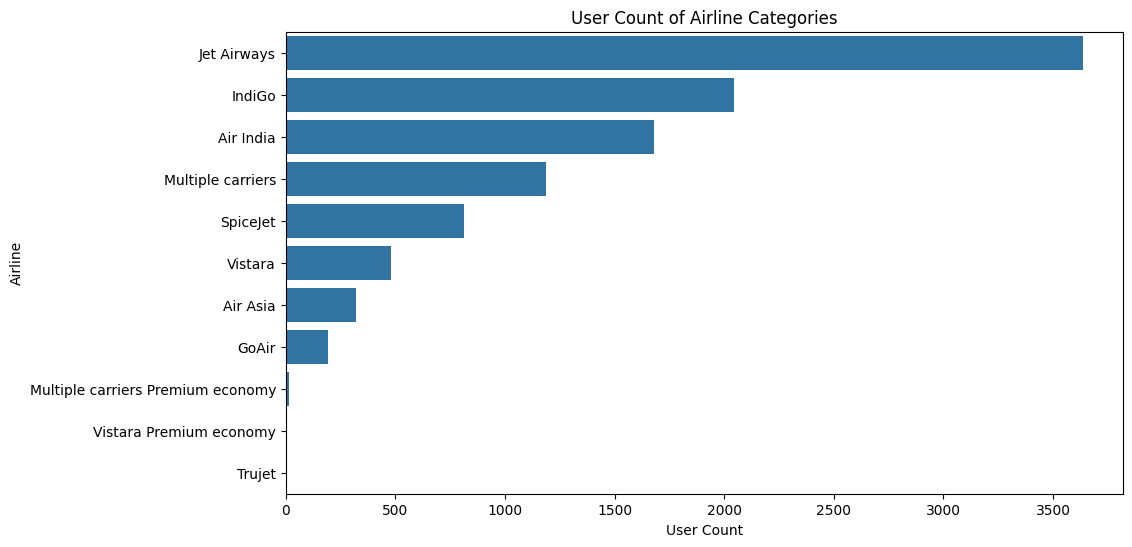

In [32]:
# barplot to show the user count of Airline Categories
plt.figure(figsize=(10.8, 6))
sns.barplot(x=train_data["Airline"].value_counts().values,
            y=train_data["Airline"].value_counts().index)
plt.title('User Count of Airline Categories')
plt.xlabel('User Count')
plt.ylabel('Airline')
plt.show()

In [33]:
mean_price_per_airline = train_data.groupby("Airline").agg({'Price': 'mean'}).reset_index().sort_values(by="Price", ascending = False)
mean_price_per_airline.rename(columns={'Price': 'Mean_Price'}, inplace=True)
print(mean_price_per_airline)

                              Airline    Mean_Price
6   Multiple carriers Premium economy  11418.846154
4                         Jet Airways  11296.615237
5                   Multiple carriers  10750.907251
1                           Air India   9398.200834
10            Vistara Premium economy   8962.333333
9                             Vistara   7801.355649
2                               GoAir   5861.056701
3                              IndiGo   5668.469897
0                            Air Asia   5590.260188
7                            SpiceJet   4312.584767
8                              Trujet   4140.000000


<ipython-input-34-bddc2dac75a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Price', y='Airline', data=mean_price_per_airline, palette='viridis')


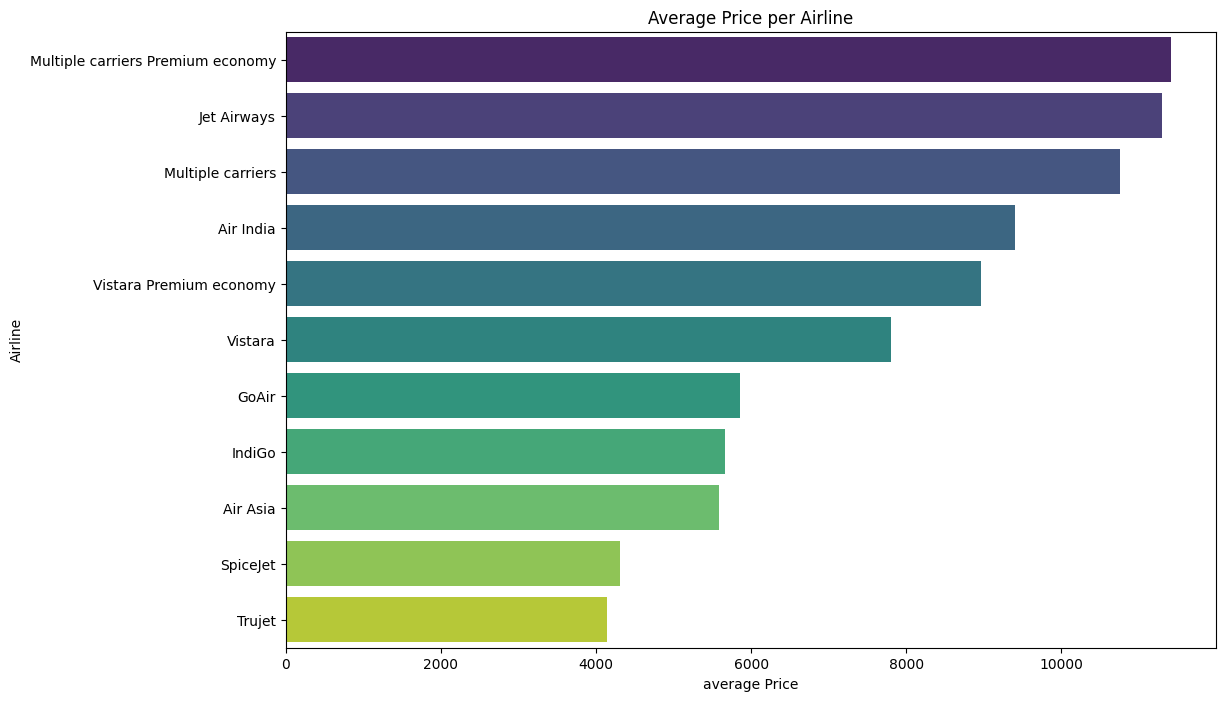

In [34]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean_Price', y='Airline', data=mean_price_per_airline, palette='viridis')
plt.title('Average Price per Airline')
plt.xlabel('average Price')
plt.ylabel('Airline')
plt.show()

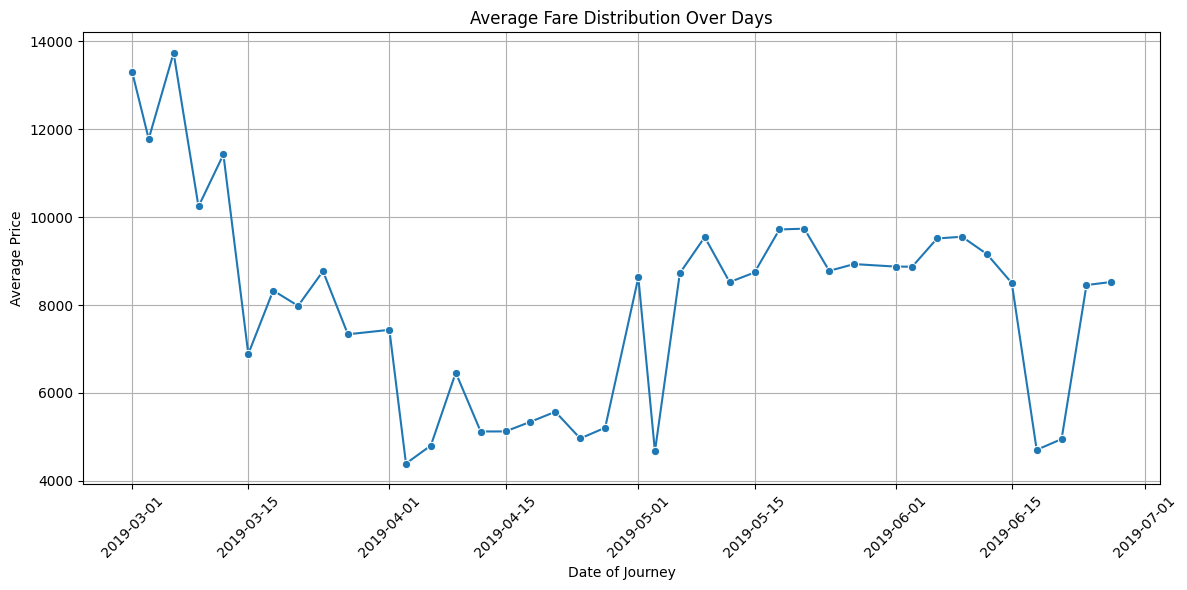

In [35]:
data = train_data.sort_values(by="Date_of_Journey")
daily_fare_sorted = data.groupby('Date_of_Journey')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_fare_sorted, x='Date_of_Journey', y='Price', marker='o')
plt.title('Average Fare Distribution Over Days')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid()
plt.show()

In [36]:
# drop old and irrleveant column
train_data = train_data.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time","Additional_Info","Z-score","Duration_h","Duration_m"],axis=1)

## Encoding Categorical Variables

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10365 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10365 non-null  object
 1   Source          10365 non-null  object
 2   Destination     10365 non-null  object
 3   Duration        10365 non-null  int64 
 4   Total_Stops     10365 non-null  int64 
 5   Price           10365 non-null  int64 
 6   Day             10365 non-null  int32 
 7   Month           10365 non-null  int32 
 8   Year            10365 non-null  int32 
 9   Day_of_week     10365 non-null  object
 10  Dep_Houe        10365 non-null  int64 
 11  Dep_Min         10365 non-null  int64 
 12  Arrival_Hour    10365 non-null  int64 
 13  Arrival_Minute  10365 non-null  int64 
 14  Route1          10365 non-null  object
 15  Route2          10365 non-null  object
 16  Route3          10365 non-null  object
 17  Route4          10365 non-null  object
 18  Route5     

In [38]:
# lets Do One Hot encoding on Categorical column
categorical_column = train_data.select_dtypes(include="object").columns
categorical_column = pd.get_dummies(train_data[categorical_column],drop_first=True)

In [39]:
categorical_column = categorical_column.astype("int64")

In [40]:
train_data = pd.concat([train_data,categorical_column],axis=1)

In [41]:
train_data

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Day_of_week,...,Route4_ HYD,Route4_ HYD,Route4_ NAG,Route4_ TRV,Route4_None,Route5_ COK,Route5_ DEL,Route5_ HYD,Route5_ VGA,Route5_None
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,2019,Sunday,...,0,0,0,0,1,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2,7662,1,5,2019,Wednesday,...,0,0,0,0,0,0,0,0,0,1
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,2019,Sunday,...,0,0,0,0,0,0,0,0,0,1
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,2019,Sunday,...,0,0,0,0,1,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,2019,Friday,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,4107,9,4,2019,Tuesday,...,0,0,0,0,1,0,0,0,0,1
10679,Air India,Kolkata,Banglore,155,0,4145,27,4,2019,Saturday,...,0,0,0,0,1,0,0,0,0,1
10680,Jet Airways,Banglore,Delhi,180,0,7229,27,4,2019,Saturday,...,0,0,0,0,1,0,0,0,0,1
10681,Vistara,Banglore,New Delhi,160,0,12648,1,3,2019,Friday,...,0,0,0,0,1,0,0,0,0,1


In [42]:
train_data = train_data.drop(['Airline', 'Source', 'Destination', 'Day_of_week', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5'],axis=1)

In [43]:
train_data

,Duration,Total_Stops,Price,Day,Month,Year,Dep_Houe,Dep_Min,Arrival_Hour,Arrival_Minute,...,Route4_ HYD,Route4_ HYD,Route4_ NAG,Route4_ TRV,Route4_None,Route5_ COK,Route5_ DEL,Route5_ HYD,Route5_ VGA,Route5_None
0,170,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,1,0,0,0,0,1
1,445,2,7662,1,5,2019,5,50,13,15,...,0,0,0,0,0,0,0,0,0,1
2,1140,2,13882,9,6,2019,9,25,4,25,...,0,0,0,0,0,0,0,0,0,1
3,325,1,6218,12,5,2019,18,5,23,30,...,0,0,0,0,1,0,0,0,0,1
4,285,1,13302,1,3,2019,16,50,21,35,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,9,4,2019,19,55,22,25,...,0,0,0,0,1,0,0,0,0,1
10679,155,0,4145,27,4,2019,20,45,23,20,...,0,0,0,0,1,0,0,0,0,1
10680,180,0,7229,27,4,2019,8,20,11,20,...,0,0,0,0,1,0,0,0,0,1
10681,160,0,12648,1,3,2019,11,30,14,10,...,0,0,0,0,1,0,0,0,0,1


## Split Data

In [44]:
x = train_data.drop(["Price"],axis=1)
y =train_data["Price"]

In [45]:
x.shape

(10365, 129)

In [46]:
y.shape

(10365,)

## Correlation Analysis and VIF Calculation for Feature Selection

<Axes: >

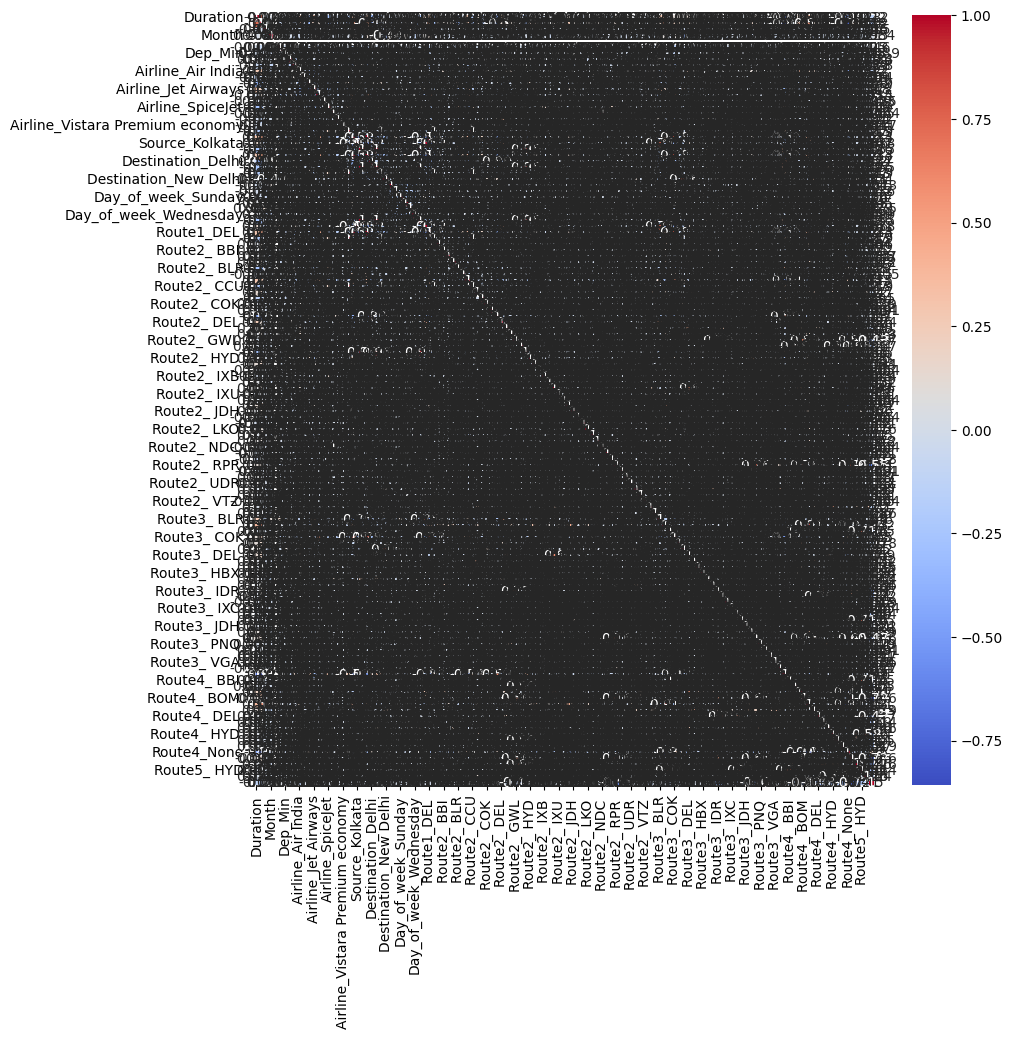

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')

In [48]:
threshold = 0.8
corr_matrix = x.corr()
high_corr_var = np.where(abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]


In [49]:
high_corr_var

[('Total_Stops', 'Route3_None'),
 ('Airline_Trujet', 'Route2_ NDC '),
 ('Source_Chennai', 'Destination_Kolkata'),
 ('Source_Chennai', 'Route1_MAA '),
 ('Source_Chennai', 'Route2_ CCU'),
 ('Source_Delhi', 'Destination_Cochin'),
 ('Source_Delhi', 'Route1_DEL '),
 ('Source_Kolkata', 'Route1_CCU '),
 ('Source_Mumbai', 'Destination_Hyderabad'),
 ('Source_Mumbai', 'Route1_BOM '),
 ('Source_Mumbai', 'Route2_ HYD'),
 ('Destination_Cochin', 'Route1_DEL '),
 ('Destination_Delhi', 'Route2_ DEL'),
 ('Destination_Hyderabad', 'Route1_BOM '),
 ('Destination_Hyderabad', 'Route2_ HYD'),
 ('Destination_Kolkata', 'Route1_MAA '),
 ('Destination_Kolkata', 'Route2_ CCU'),
 ('Route1_BOM ', 'Route2_ HYD'),
 ('Route1_MAA ', 'Route2_ CCU'),
 ('Route3_ BOM ', 'Route4_ COK'),
 ('Route3_ CCU ', 'Route4_ BBI '),
 ('Route4_ BOM ', 'Route5_ COK'),
 ('Route4_ COK', 'Route4_None')]

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
print(vif.sort_values(by="VIF",ascending=False))

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                             Feature       VIF
128                      Route5_None       inf
27             Destination_New Delhi       inf
114                     Route4_ BOM        inf
113                      Route4_ BLR       inf
111                     Route4_ BBI        inf
..                               ...       ...
18   Airline_Vistara Premium economy  1.014764
49                      Route2_ DED   1.013775
59                      Route2_ IXA   1.011405
81                      Route2_ VTZ   1.011168
4                               Year  0.000000

[129 rows x 2 columns]


In [51]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [52]:
# let's remove high VIF value Feature
max_vif = 10
remove_column = True

while remove_column:
    vif = pd.DataFrame()
    vif["Feature"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    max_vif_feature = vif.loc[vif["VIF"].idxmax()]

    if max_vif_feature["VIF"] > max_vif:
        x = x.drop(max_vif_feature["Feature"],axis=1)
        print(f"Removed feature '{max_vif_feature['Feature']}' with VIF = {max_vif_feature['VIF']:.2f}")
    else:
        remove_column = False

Removed feature 'Total_Stops' with VIF = inf
Removed feature 'Airline_Trujet' with VIF = inf
Removed feature 'Source_Chennai' with VIF = inf
Removed feature 'Source_Delhi' with VIF = inf
Removed feature 'Source_Kolkata' with VIF = inf
Removed feature 'Source_Mumbai' with VIF = inf
Removed feature 'Destination_Cochin' with VIF = inf
Removed feature 'Destination_Delhi' with VIF = inf
Removed feature 'Destination_Hyderabad' with VIF = inf
Removed feature 'Destination_Kolkata' with VIF = inf
Removed feature 'Route1_BOM ' with VIF = inf
Removed feature 'Route1_CCU ' with VIF = inf
Removed feature 'Route1_DEL ' with VIF = inf
Removed feature 'Route1_MAA ' with VIF = inf
Removed feature 'Route2_ BLR' with VIF = inf
Removed feature 'Route2_ HBX ' with VIF = inf
Removed feature 'Route3_ BLR' with VIF = inf
Removed feature 'Route3_ CCU ' with VIF = inf
Removed feature 'Route3_ IMF ' with VIF = inf
Removed feature 'Route3_ JAI ' with VIF = inf
Removed feature 'Route4_ BBI ' with VIF = inf
Removed

In [53]:
print(x.columns)
print(f"Remaining feature {(x.shape[1])}")

Index(['Duration', 'Day', 'Dep_Houe', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_New Delhi', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Route2_ ATQ ', 'Route2_ BBI ', 'Route2_ BDQ ',
       'Route2_ BHO ', 'Route2_ BLR ', 'Route2_ CCU', 'Route2_ CCU ',
       'Route2_ COK', 'Route2_ COK ', 'Route2_ DED ', 'Route2_ DEL',
       'Route2_ DEL ', 'Route2_ GAU ', 'Route2_ GOI ', 'Route2_ GWL ',
       'Route2_ HYD', 'Route2_ HYD ', 'Route2_ IDR ', 'Route2_ IXA ',
       'Route2_ IXB ', 'Route2_ IXC ', 'Route2_ IXR ', 'Route2_ IXU ',
       'Route2_ IXZ ', 'Route2_ JAI ', 'Route2_ JDH ', 'Route2_ JLR ',
      

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [56]:
x_test_sc

array([[-0.92479487, -0.19097962, -1.1328331 , ..., -0.02456328,
        -0.01098238, -0.01098238],
       [ 0.3998913 , -0.90287127, -0.25625116, ..., -0.02456328,
        -0.01098238, -0.01098238],
       [ 0.29033079, -0.19097962,  1.32159633, ..., -0.02456328,
        -0.01098238, -0.01098238],
       ...,
       [ 2.22257979, -0.90287127,  0.79564717, ..., -0.02456328,
        -0.01098238, -0.01098238],
       [ 0.2504906 ,  0.52091204, -1.1328331 , ..., -0.02456328,
        -0.01098238, -0.01098238],
       [ 1.43573613,  1.2328037 ,  1.49691272, ..., -0.02456328,
        -0.01098238, -0.01098238]])

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV

# Model Building


In [58]:
models = {
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SVR":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [59]:
result = []

for model_name,model in models.items():
  model.fit(x_train_sc,y_train)
  y_pred = model.predict(x_test_sc)
  score = model.score(x_train_sc, y_train)
  test_score = model.score(x_test_sc, y_test)


  result.append({
      "Model": model_name,
      "train R²": score,
      "test R²": test_score
  })

  df = pd.DataFrame(result)
  df = pd.DataFrame(result)


In [60]:
print(df)

                       Model  train R²       test R²
0           LinearRegression  0.683966 -1.184946e+23
1      DecisionTreeRegressor  0.961333  6.746094e-01
2      RandomForestRegressor  0.946457  7.904404e-01
3  GradientBoostingRegressor  0.750443  7.317927e-01
4               XGBRegressor  0.906663  8.438681e-01
5          AdaBoostRegressor  0.560549  5.379729e-01
6                        SVR  0.027152  2.476521e-02
7        KNeighborsRegressor  0.831937  7.365775e-01


In [61]:
df["train R²"] = df["train R²"].apply(lambda x: f"{x * 100:.2f}%")
df["test R²"] = df["test R²"].apply(lambda x: f"{x * 100:.2f}%")

In [62]:
print(df)

                       Model train R²                          test R²
0           LinearRegression   68.40%  -11849463973249283124101120.00%
1      DecisionTreeRegressor   96.13%                           67.46%
2      RandomForestRegressor   94.65%                           79.04%
3  GradientBoostingRegressor   75.04%                           73.18%
4               XGBRegressor   90.67%                           84.39%
5          AdaBoostRegressor   56.05%                           53.80%
6                        SVR    2.72%                            2.48%
7        KNeighborsRegressor   83.19%                           73.66%


# observation:
1) **RandomForestRegressor** demonstrates strong performance with a high training R² of 94.68% and a decent test R² of 79.04%, indicating good generalization but a slight risk of overfitting compared to other models like **DecisionTreeRegressor**, which shows a high train R² of 96.13% but a much lower test R² of 67.46%, suggesting overfitting.

2) **XGBRegressor** is selected for its balanced performance, with a** training R² of 90.67%** and the **highest test R² of 84.39%**, indicating that it generalizes well to unseen data and outperforms other models in terms of both accuracy and robustness.

3) ***GradientBoostingRegressor and KNeighborsRegressor *** also show decent test R² scores, but XGBRegressor is preferred for its ability to consistently deliver high accuracy across both training and test sets, making it the most reliable model for this problem..

## Hyperparameter Training

In [63]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
params = {
    "learning_rate" : [0.05,0.1,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,9,10,11,12],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.6]
}
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,  # Use param_distributions for RandomizedSearchCV
    scoring="r2",
    n_jobs=-1,
    cv=5,
    n_iter=100,  # Number of parameter settings that are sampled
    verbose=3
)

random_search.fit(x_train_sc, y_train)
print(f"Best Score: {random_search.best_score_}")
print(f"Best Params: {random_search.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score: 0.8389517966187292
Best Params: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [72]:
from sklearn.model_selection import cross_val_score
xgb_best = XGBRegressor(
    min_child_weight=3,
    max_depth=6,
    learning_rate=0.3,
    gamma=0.1,
    colsample_bytree=0.6
)
cv_score = cross_val_score(xgb_best,x_train_sc,y_train,cv=10)
print(f"cross validation : {cv_score}")
print(f"cross validation : {cv_score.mean()}")

cross validation : [0.82514754 0.85054536 0.83631092 0.83437948 0.83507126 0.8586515
 0.84804026 0.85780702 0.82436294 0.83497976]
cross validation : 0.8405296047910547


Observation:

The XGBRegressor model demonstrates reliable and effective performance with a mean R² score of approximately 0.84, indicating strong predictive capability. The consistent scores across cross-validation folds reflect good generalization to unseen data. The current hyperparameters are well-suited for the dataset, ensuring robust performance.

In [73]:
xgb_best = XGBRegressor(
    min_child_weight=3,
    max_depth=9,
    learning_rate=0.15,
    gamma=0.0,
    colsample_bytree=0.5
)
xgb_best.fit(x_train_sc,y_train)
y_pred = xgb_best.predict(x_test_sc)
print(f"Model train score: {xgb_best.score(x_train_sc, y_train):.4f}")
print(f"Model test score: {xgb_best.score(x_test_sc, y_test):.4f}")
print(f"R² score: {r2_score(y_test, y_pred):.4f}")

Model train score: 0.9224
Model test score: 0.8370
R² score: 0.8370


Observation:
After applying hyperparameter tuning, the model achieved a train score of 0.9224 and a test score of 0.8370, indicating a well-generalized model with consistent performance.

## Heteroscadscity

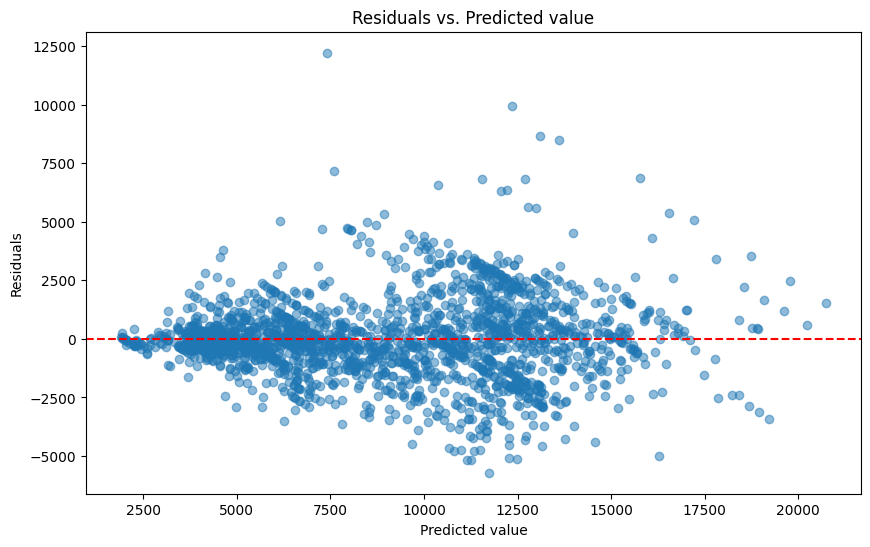

In [66]:
# check for there is availibilty of heteroscadscity
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals,alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted value')
plt.show()

Observation:

By visualizing the graph of predictions vs. residuals, it is evident that the variance of residuals is not constant across different levels of predicted values. This indicates the presence of heteroscedasticity in the model.

In [67]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
X_train_with_const = sm.add_constant(x_train_sc)
model = sm.OLS(y_train, X_train_with_const).fit()
residuals = model.resid
white_test = het_white(residuals, X_train_with_const)
white_test_statistic, white_test_pvalue, _, _ = white_test
print(f'White test statistic: {white_test_statistic}')
print(f'White test p-value: {white_test_pvalue}')

White test statistic: 3089.7768515915545
White test p-value: 3.758473076157474e-262


Observation:

The White test indicates a strong presence of heteroscedasticity in the model, as evidenced by the extremely high test statistic and an almost zero p-value.

In [68]:
# Use log transformation to reduce Heterscoacity
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


xgb_log = XGBRegressor()
xgb_log.fit(x_train_sc, y_train_log)


y_pred_log = xgb_log.predict(x_test_sc)
y_pred_exp = np.expm1(y_pred_log)


from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_exp)
print(f'R² score with log transformation: {r2}')


R² score with log transformation: 0.8479573583885944


# Final Result:
1) The final **XGBRegressor** model, after applying **log transformation**, achieved an **R² score of 0.848**, indicating an improvement in predictive performance compared to the original model. The original model had a training R² score of 0.9105 and a test R² score of 0.8376

2) The log transformation improved the model's fit and accuracy by reducing heteroscedasticity and enhancing performance

In [69]:
import pickle
# Save the log-transformed model
with open("xgb_log.pkl", "wb") as f:
    pickle.dump(xgb_log, f)

In [70]:
# Load the log-transformed model
with open("xgb_log.pkl", "rb") as f:
    xgb_log_loaded = pickle.load(f)

y_pred_log_loaded = xgb_log_loaded.predict(x_test_sc)
y_pred_exp_loaded = np.expm1(y_pred_log_loaded)
r2_loaded = r2_score(y_test, y_pred_exp_loaded)
print(f'R² score with loaded log-transformed model: {r2_loaded}')

R² score with loaded log-transformed model: 0.8479573583885944


In [71]:
# DONE